In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df = pd.read_csv('C:/Users/Hp/Downloads/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [198]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [199]:
del df['deck'] # Contains 688 unknown values
del df['embark_town'] # Replaced with 'embarked'
df.age = df.age.fillna(df.age.mean())
df.embarked = df.embarked.fillna(df.embarked.mode()[0])

In [200]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [201]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA ANALYSIS

In [202]:
a=['age','fare']
b=['survived','pclass','sex','parch','embarked','who','adult_male','alive','alone','sibsp','class']

In [203]:
e_count=df['embarked'].value_counts()
#d_count=df['deck'].value_counts()
c_count=df['class'].value_counts()
p_count=df['pclass'].value_counts()
print(e_count.sort_index())
#print(d_count.sort_index()) 
print(c_count.sort_index()) 
print(p_count.sort_index())

C    168
Q     77
S    646
Name: embarked, dtype: int64
First     216
Second    184
Third     491
Name: class, dtype: int64
1    216
2    184
3    491
Name: pclass, dtype: int64


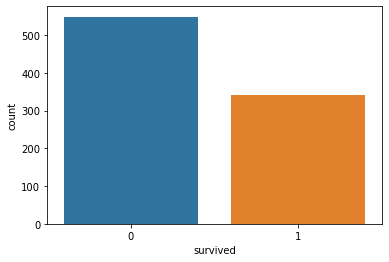

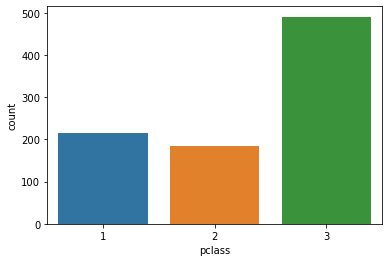

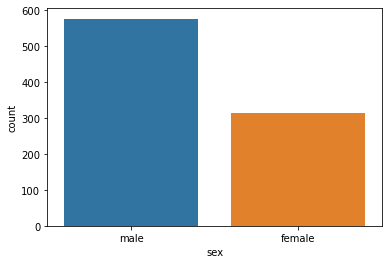

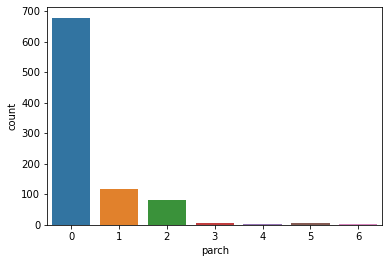

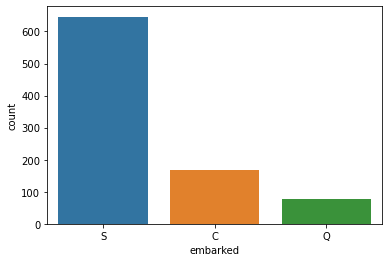

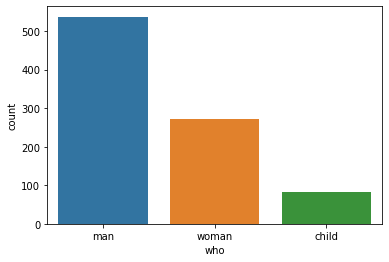

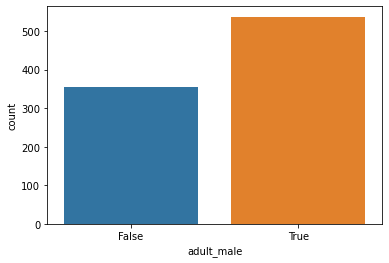

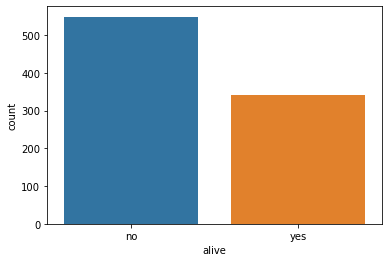

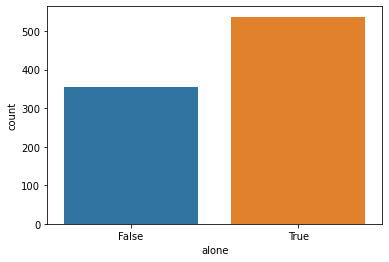

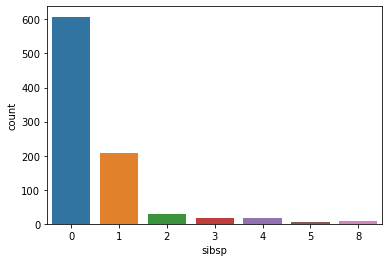

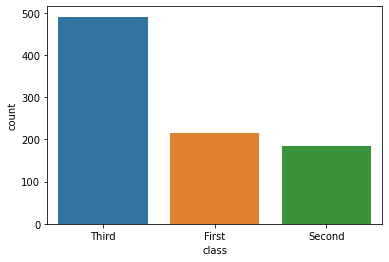

In [204]:
for i in b:
    sns.countplot(df[i])
    plt.show()

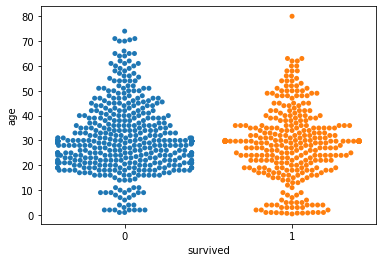

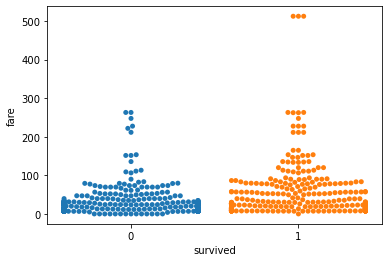

In [205]:
for i in a:
    sns.swarmplot(y=df[i],x=df['survived'])
    plt.show()

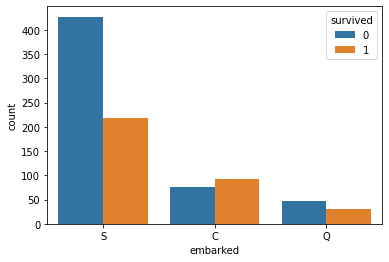

In [206]:
sns.countplot(df['embarked'],hue=df['survived'])

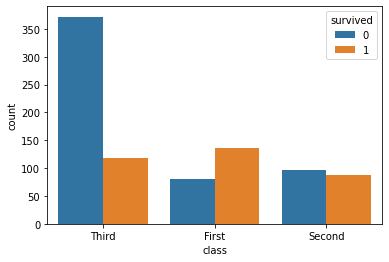

In [207]:
sns.countplot(df['class'],hue=df['survived'])

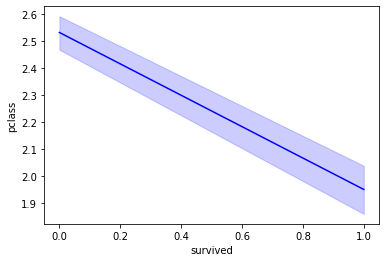

In [208]:
x = df['survived']
z = df['pclass']
sns.lineplot(x, z, color = 'blue')

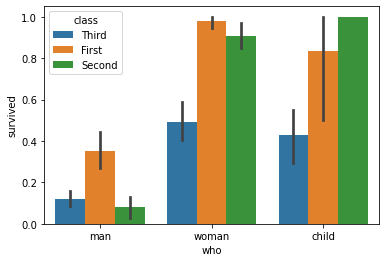

In [209]:
sns.barplot(y=df['survived'],x=df['who'],hue=df['class'])

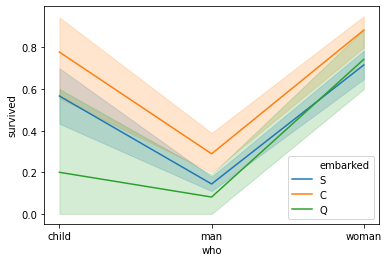

In [210]:
sns.lineplot(y=df['survived'],x=df['who'],hue=df['embarked'])

# ANALYSIS REPORT

In [211]:
df=pd.get_dummies(df)

In [212]:
df.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,embarked_Q,embarked_S,class_First,class_Second,class_Third,who_child,who_man,who_woman,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,1,0,0,1,0,1,0,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,0,0,1,0,0,0,0,1,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,1,0,0,1,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,0,1,1,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,1,0,0,1,0,1,0,1,0


In [213]:
del df['sex_male']
del df['alive_no']
del df['embarked_S']
del df['pclass']
del df['class_Third']
del df['who_child']

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      891 non-null    int64  
 1   age           891 non-null    float64
 2   sibsp         891 non-null    int64  
 3   parch         891 non-null    int64  
 4   fare          891 non-null    float64
 5   adult_male    891 non-null    bool   
 6   alone         891 non-null    bool   
 7   sex_female    891 non-null    uint8  
 8   embarked_C    891 non-null    uint8  
 9   embarked_Q    891 non-null    uint8  
 10  class_First   891 non-null    uint8  
 11  class_Second  891 non-null    uint8  
 12  who_man       891 non-null    uint8  
 13  who_woman     891 non-null    uint8  
 14  alive_yes     891 non-null    uint8  
dtypes: bool(2), float64(2), int64(3), uint8(8)
memory usage: 43.6 KB


# LogisticRegression

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score

In [227]:
df['adult_male'] = df['adult_male']*1
df['alone'] = df['alone']*1
df.head()

,survived,age,sibsp,parch,fare,adult_male,alone,sex_female,embarked_C,embarked_Q,class_First,class_Second,who_man,who_woman,alive_yes
0,0,22.0,1,0,7.2500,1,0,0,0,0,0,0,1,0,0
1,1,38.0,1,0,71.2833,0,0,1,1,0,1,0,0,1,1
2,1,26.0,0,0,7.9250,0,1,1,0,0,0,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0,1,1
4,0,35.0,0,0,8.0500,1,1,0,0,0,0,0,1,0,0


In [228]:
x = df.drop('survived',axis=1)
y= df['survived']

In [229]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2) # 20% testing dataset

In [230]:
xtrain.shape,ytrain.shape

((712, 14), (712,))

In [231]:
xtest.shape,ytest.shape

((179, 14), (179,))

In [232]:
model = LogisticRegression()

In [233]:
model.fit(xtrain,ytrain)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [234]:
ypred = model.predict(xtest)

In [235]:
print('accuracy = ',accuracy_score(ytest,ypred))

accuracy =  1.0


In [236]:
print('accuracy = ',r2_score(ytest,ypred))

accuracy =  1.0
